# Report
## Mehdi el Bouzidi, Alex Zoutewelle, Furkan Ucar
### Product Description Generator


## 1. Problem Statement
Writing product descriptions can be a very time consuming activity, human written descriptions can also be uncompelling because of typos, incorrect writing style and lack of knowledge about a certain product. 
This is an actual practical problem:
- An uncompelling product description can impact conversion rate, customers tend to read every letter on a product before buying it.
- Product descriptions affect SEO, the search engines rely on the use of keywords.
- Prone to human error, for example, typos or lack of knowledge about a certain product could lead to misleading the customer.
- Time consuming process usually done by content or SEO marketeers.

Product Descriptions can be found on all kinds of ecommerce platforms, in many different forms. In this case we are interested in a certain range of products, along with a certain type of product descriptions. Laptops is our starting point, the data characteristics of this product category is very broad. The data usually tends to describe a certain purpose of the product. This purpose is usually linked to a certain target audience. Laptops can have a gaming purpose, meant for gamers. 
Each product purpose has a different target audience, different writing style and also varies in the use of keywords. Below we compare product descriptions with different purposes.

#### Editting purpose
"Multitask while you're editing a photo on the HP Pavilion Notebook 15-cw1948nd. Thanks to the 16GB of RAM, you can quickly switch between running programs. The 15.6-inch Full HD display lets you simultaneously work in 2 windows, allowing you work more efficiently in Word while browsing the internet for information. You can also bring the HP to work, as it only weighs 1.85 kilograms. The 512GB SSD lets you boot the Pavilion in 15 seconds, while also offering plenty of storage space for thousands of photos. While watching a YouTube video, you're provided with clear audio by the Bang and Olufsen speakers. On top of that, you can perfectly type in the dark thanks to the back-lit keyboard."
 
#### Gaming purpose
"Ready for battle and eager for a fight, the Helios 300 drops you into the game with everything you need. Only now we've armed it with NVIDIA GeForce GTX 1660 Ti  graphics, the latest 9th Gen Intel Core i7 Processor and our custom-engineered 4th Gen AeroBlade 3D Fan Technology. With the 144Hz IPS panel and 3ms Overdrive response time you can say farewell to blur and hello clear, crisp, high-octane gameplay"


We see that there is a clear distinction in writing style and purpose, formal and rather informal, gaming purpose and editing purpose.

## 2. Methods and Pipelines
### Data collection
Like any other deep learning project, this project also requires some data for the model training. So that after it gets trained it would be able to generate the descriptions of the products. We started off with the data collection of laptops. The data that we collected contains the model name, its purpose and a description that describes the purpose of the product. After that, we made a csv file of the data and then read the file using pandas data frame:


In [2]:
import pandas as pd
df = pd.read_csv('Data.csv',sep=';') ## Using ";" as seperator between columns
df

,Brand,Model,Purpose,Description
0,HP,ENVY 17-ce1906nd,Editting,"On the HP ENVY 17-ce1906nd, you can edit photo..."
1,HP,HP Pavilion Gaming 17-cd0917nd,Gaming,The HP Pavilion Gaming 17-cd0917nd has a 17.3-...
2,Lenovo,Lenovo IdeaPad L340-17IRH 81LL003BMH,Gaming,The Lenovo IdeaPad L340-17IRH 81LL003BMH is a ...
3,Lenovo,Lenovo Legion Y540-17IRH 81Q4001AMH,Gaming,The Lenovo Legion Y540-17IRH 81Q4001AMH is a 1...
4,HP,HP Pavilion G 17-cd0100nd,Gaming,The HP Pavilion G 17-cd0100nd is an entry-leve...
...,...,...,...,...
91,HP,HP Pavilion 15-cs3970nd,Editting,The HP Pavilion 15-cs3970nd can handle the mos...
92,HP,HP 17-ca1901nd,Editting,The HP 17-ca1901nd is a 17.3-inch laptop that ...
93,HP,HP ENVY 17-ce1907nd,Editting,"On the HP ENVY 17-ce1907nd, you can edit video..."
94,HP,HP Pavilion 15-cs3965nd,Editting,The HP Pavilion 15-cs3965nd is a good laptop i...


### Data visualization
After this, we moved towards the data visualization part. Data visualization is the act of taking information (data) and placing it into a visual context, such as a map or graph. Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect patterns, trends, and outliers in groups of data. It is considered to be the vital part of any project as it shows large volumes of data in an understandable and coherent way, which in turn helps us comprehend the information and draw conclusions and insights.

For visualization we used some bar charts, histograms and word clouds to analyze the corpus that is built using our data set. We started off with checking the distribution of data for each of the product types. And for that we used a pie chart.


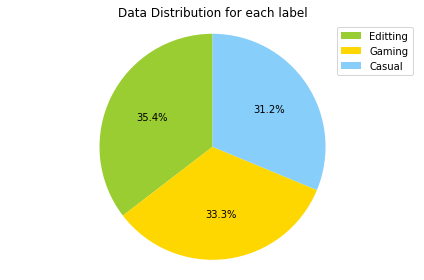

In [3]:
### Pie chart showing the class distribution in data

import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = list(df['Purpose'].unique())
sizes = list(df['Purpose'].value_counts())
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts,per = plt.pie(sizes, colors=colors, startangle=90,autopct='%0.1f%%')
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Data Distribution for each label')
plt.tight_layout()
plt.show()

In [5]:
## Visualzing the description of each categories
gamedf=df[df['Purpose']=='Gaming']
eddf=df[df['Purpose']=='Editting']
casdf=df[df['Purpose']=='Casual']

Then we used a histogram that shows the lengths of the description of the products with respect to frequency of the words. Histogram shows an accurate graphical representation of the distribution of data. It shows an estimate of the probability distribution of a continuous variable. Here in the figure pink color is showing description of games, blue is showing the description of editing description, yellow is showing the description of casual laptops description.

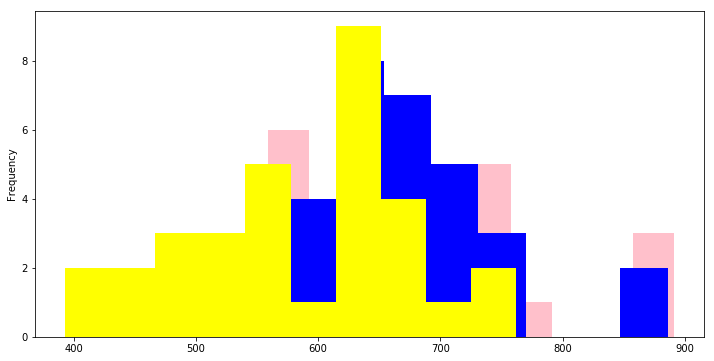

In [6]:
## Histogram showing the length of desciption of all categories
gamedf['Description'].str.len().plot.hist(color = 'pink', figsize = (12, 6))
eddf['Description'].str.len().plot.hist(color = 'blue', figsize = (12, 6))
casdf['Description'].str.len().plot.hist(color = 'yellow', figsize = (12, 6))

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
from wordcloud import WordCloud


We used Word Cloud and bar chart to show the most occurring words for each product category. Word Cloud is basically a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Here are word clouds and bar chart for frequently occurring words for each category.

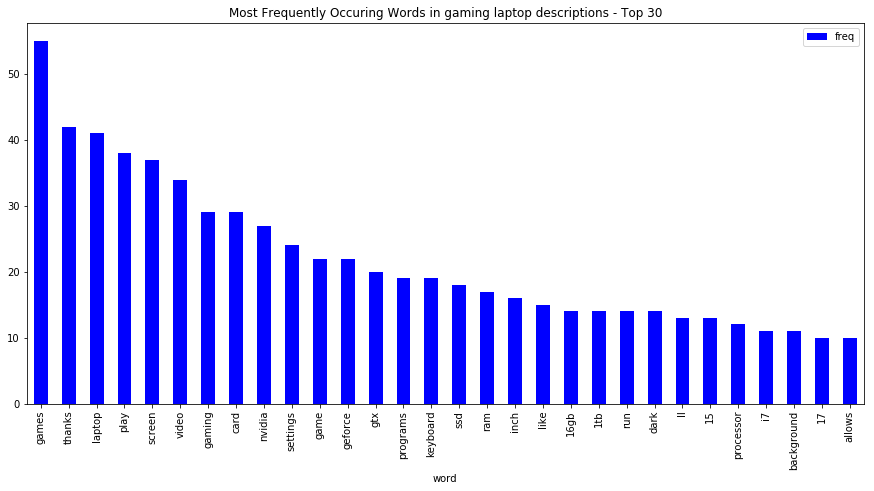

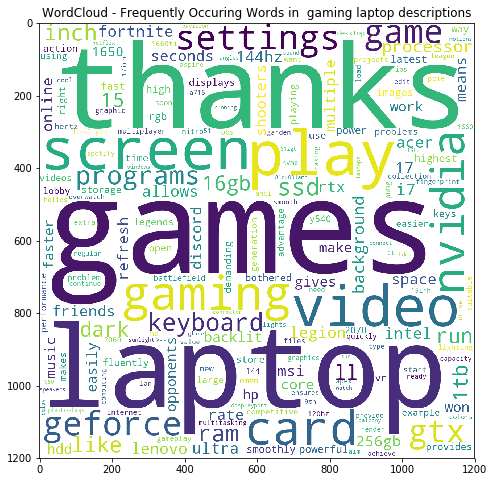

In [8]:

words = cv.fit_transform(gamedf.Description)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words in gaming laptop descriptions - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Frequently Occuring Words in  gaming laptop descriptions", fontsize = 12)

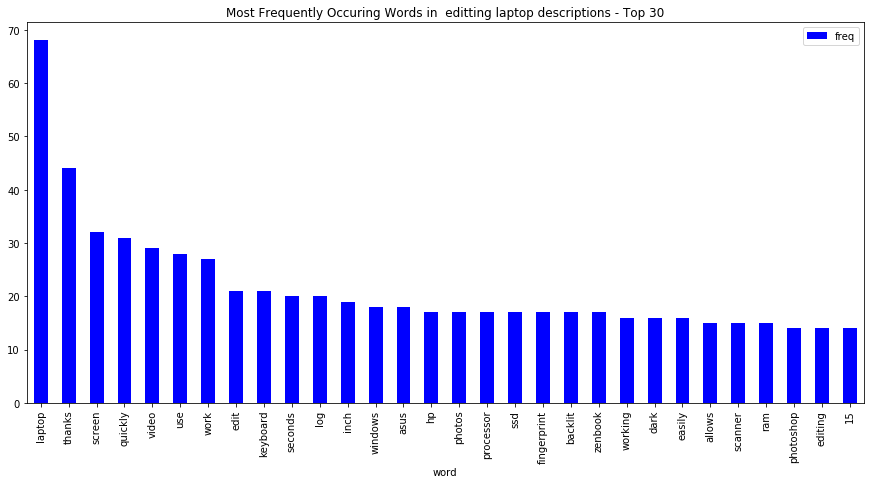

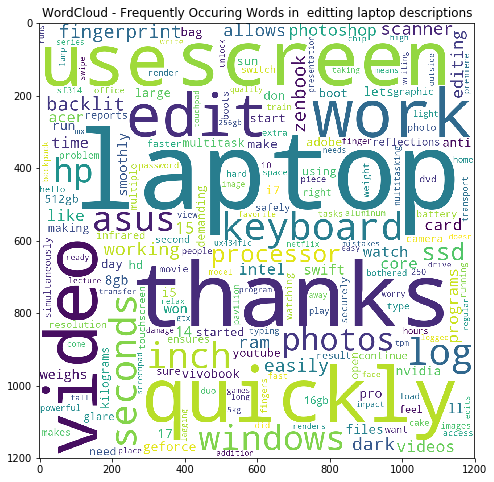

In [9]:

words = cv.fit_transform(eddf.Description)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words in  editting laptop descriptions - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Frequently Occuring Words in  editting laptop descriptions", fontsize = 12)

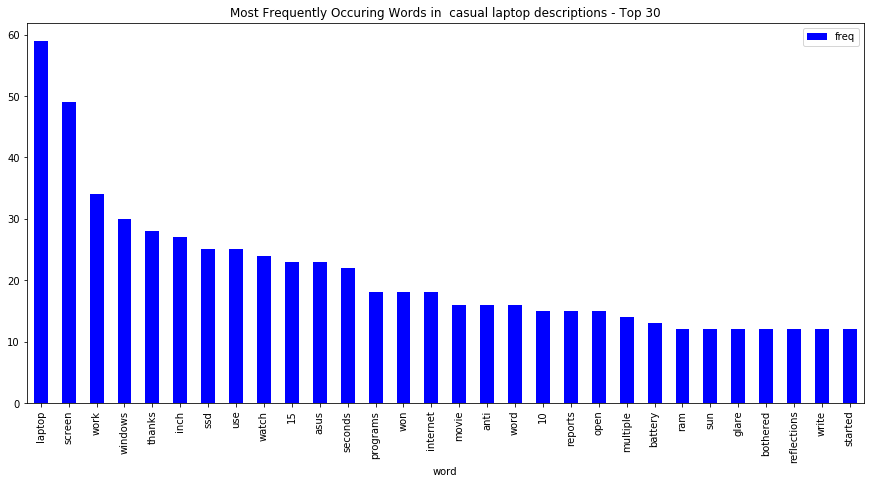

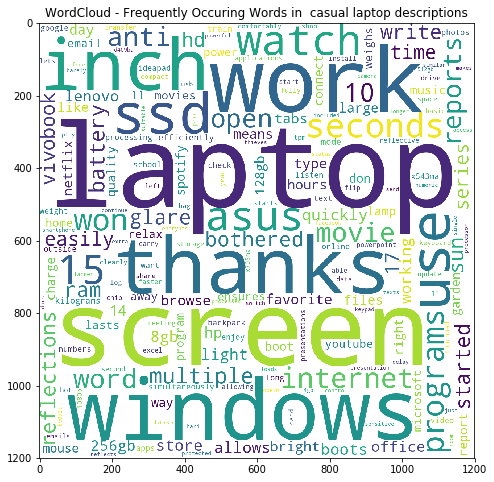

In [10]:

words = cv.fit_transform(casdf.Description)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words in  casual laptop descriptions - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Frequently Occuring Words in  casual laptop descriptions", fontsize = 12)

### Pre-processing
Now that we have visualized our data , we will proceed towards the pre-processing of our data. Data preprocessing is a very important step for dealing with data sets. This is because it leads to better data sets, that are cleaner and are more manageable. The scraped descriptions had some flaws to them. Many of these descriptions had the brand and model name of the product in the description.  In order to generate correct descriptions these model and brand names had to be filtered out. We wrote a script that filters out these brand and model names and leaves us with a clean and multipurpose description.


In [3]:
def pre_process_descriptions(descriptions,to_replace, with_replace):
    """Function that will replace the product name with the prodcut description"""
    new_desc=[]
    for i in range(len(to_replace)):
        temp=str(descriptions[i])
        new_desc.append(temp.replace(to_replace[i],with_replace[i]))
    return new_desc

In [4]:
purpose= df['Purpose'].values
desc=    df['Description'].values
models=  df['Model'].values

preprocess_desc= pre_process_descriptions(desc,models,purpose)
df['preprocess_desc']=preprocess_desc

In [5]:
df

,Brand,Model,Purpose,Description,preprocess_desc
0,HP,ENVY 17-ce1906nd,Editting,"On the HP ENVY 17-ce1906nd, you can edit photo...","On the HP Editting, you can edit photos more q..."
1,HP,HP Pavilion Gaming 17-cd0917nd,Gaming,The HP Pavilion Gaming 17-cd0917nd has a 17.3-...,The Gaming has a 17.3-inch screen that allows ...
2,Lenovo,Lenovo IdeaPad L340-17IRH 81LL003BMH,Gaming,The Lenovo IdeaPad L340-17IRH 81LL003BMH is a ...,The Gaming is a 17.3-inch gaming laptop with N...
3,Lenovo,Lenovo Legion Y540-17IRH 81Q4001AMH,Gaming,The Lenovo Legion Y540-17IRH 81Q4001AMH is a 1...,The Gaming is a 17.3-inch gaming laptop that h...
4,HP,HP Pavilion G 17-cd0100nd,Gaming,The HP Pavilion G 17-cd0100nd is an entry-leve...,The Gaming is an entry-level gaming laptop for...
...,...,...,...,...,...
91,HP,HP Pavilion 15-cs3970nd,Editting,The HP Pavilion 15-cs3970nd can handle the mos...,The Editting can handle the most demanding tas...
92,HP,HP 17-ca1901nd,Editting,The HP 17-ca1901nd is a 17.3-inch laptop that ...,The Editting is a 17.3-inch laptop that houses...
93,HP,HP ENVY 17-ce1907nd,Editting,"On the HP ENVY 17-ce1907nd, you can edit video...","On the Editting, you can edit videos more quic..."
94,HP,HP Pavilion 15-cs3965nd,Editting,The HP Pavilion 15-cs3965nd is a good laptop i...,The Editting is a good laptop if you want to m...


### Model Building and training

In [6]:


from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 
import pandas as pd
import numpy as np
import string, os 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)



Using TensorFlow backend.


In [7]:
all_descriptions= df['preprocess_desc'].values
corpus = [x for x in all_descriptions]
corpus[:1]

["On the HP Editting, you can edit photos more quickly with Adobe Photoshop. The powerful i5 processor takes care of the image edits. While you're editing, the NVIDIA GeForce MX 250 video card renders the images smoothly and quickly. The large 17.3-inch screen allows you to work in 2 windows at the same time for efficient multitasking. Boot the laptop in 15 seconds with the 512GB SSD to start working quickly. As you boot the HP, you can unlock it with your fingerprint using the fingerprint scanner. That means only you can access the laptop. In the dark, you won't make mistakes typing the title of your favorite Netflix show, thanks to the backlit keyboard."]

In [8]:
t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)
t.fit_on_texts(corpus)

In [9]:

# A dictionary of words and their uniquely assigned integers.
print(t.word_index)
# A dictionary of words and how many documents each appeared in.
print(t.word_docs)
# An integer count of the total number of documents that were used to fit the Tokenizer (i.e. total number of documents)
print(t.document_count)
# A dictionary of words and their counts.
print(t.word_counts)




{'the': 1, 'you': 2, 'to': 3, 'can': 4, 'a': 5, 'in': 6, 'and': 7, 'on': 8, 'your': 9, 'with': 10, 'laptop': 11, 'of': 12, 'this': 13, 'screen': 14, 'thanks': 15, 'is': 16, 'or': 17, 'for': 18, 'at': 19, 'also': 20, 'work': 21, 'video': 22, 'that': 23, 'inch': 24, 'ssd': 25, 'games': 26, 'use': 27, 'gaming': 28, 'it': 29, 'so': 30, 'seconds': 31, 'windows': 32, 'programs': 33, 'be': 34, 'quickly': 35, 'card': 36, 'has': 37, 'play': 38, 'ram': 39, 'keyboard': 40, '15': 41, 'as': 42, 'which': 43, 'by': 44, 'watch': 45, 'nvidia': 46, "won't": 47, 'allows': 48, 'like': 49, 'easily': 50, 'because': 51, '1': 52, 'more': 53, 'an': 54, 'editting': 55, 'processor': 56, 'while': 57, 'geforce': 58, 'dark': 59, 'all': 60, 'than': 61, 'time': 62, 'casual': 63, 'without': 64, 'working': 65, 'open': 66, 'multiple': 67, 'have': 68, 'from': 69, 'anti': 70, "you'll": 71, 'backlit': 72, 'settings': 73, '3': 74, 'game': 75, 'edit': 76, 'same': 77, 'full': 78, 'intel': 79, 'run': 80, 'enough': 81, 'photos'

In [10]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)

After that we moved to the model training section. Now that we know that a model cannot work on the textual data, so our first task is to generate numeric numbers for each of the text written in the description column. So we will first store the all the sentences in the description column in an array called corpus. So for that we will first tokenize the text. Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. In the process of tokenization, we excluded the characters like punctuation marks “!"#$&()*+,-./:;<=>?@[\\]^_`{|}~\t\n” , also we converted all the text into lowercase. Once we have tokenized our characters we convert each of the token into a sequence number. And for that we used a preprocessing function in Keras tokenizer. 

We know that each description has a different amount of words, so for each line the sequence length will be different. Here are the sequences for the first 5 lines:


In [11]:
# Tokenization
tok = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

def token_sequence(corpus):
    """Used to generate the tokens for the given corpus of the text"""
    tok.fit_on_texts(corpus)
    total_words = len(tok.word_index) + 1
    
    input_sequences = []
    for line in corpus:
        token_list = tok.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
            
    return input_sequences, total_words
input_sequences, total_words = token_sequence(corpus)

In [12]:
input_sequences

[[8, 1],
 [8, 1, 139],
 [8, 1, 139, 55],
 [8, 1, 139, 55, 2],
 [8, 1, 139, 55, 2, 4],
 [8, 1, 139, 55, 2, 4, 76],
 [8, 1, 139, 55, 2, 4, 76, 82],
 [8, 1, 139, 55, 2, 4, 76, 82, 53],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35, 10],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35, 10, 185],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35, 10, 185, 122],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35, 10, 185, 122, 1],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35, 10, 185, 122, 1, 155],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35, 10, 185, 122, 1, 155, 186],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35, 10, 185, 122, 1, 155, 186, 56],
 [8, 1, 139, 55, 2, 4, 76, 82, 53, 35, 10, 185, 122, 1, 155, 186, 56, 531],
 [8,
  1,
  139,
  55,
  2,
  4,
  76,
  82,
  53,
  35,
  10,
  185,
  122,
  1,
  155,
  186,
  56,
  531,
  532],
 [8,
  1,
  139,
  55,
  2,
  4,
  76,
  82,
  53,
  35,
  10,
  185,
  122,
  1,
  155,
  186,
  56,
  531,
  532,
  12],
 [8,
  1,
  139,
  55,
  2,
  4,
  76,
  82,
  53,
  35,
 

In [13]:
# pad sequences 
def generate_padded_sequences(input_sequences):
    """Use to add paddings to all the sequences"""
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))
    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes = total_words)
    
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(input_sequences)

But to feed this data in the model we need to have the same shape for each of the lines as our model cannot expect to take an input that has a different shape for each line. So for that we will make use of the padding. Since every sentence in the text has not the same number of words, we can also define the maximum number of words for each sentence, if a sentence is longer then we can drop some words. We use padding=”pre” which means it will  add the zeros at the start of the sequence to make the samples in the same size. We use maxlen=155: This input defines the maximum number of words in our sentences, the default maximum length of sentences is defined by the longest sentence.
When a sentence exceeds the number of maximum words, it will drop the words and by default setting, it will drop the words at the beginning of the sentence. 

The result of the padding sequences is pretty straight forward. You can now observe that the list of sentences that have been padded out into a matrix where each row in the matrix has an encoded sentence with the same length, this is due to the:
- Additional zeros for short sentences
- Truncating the sentences which exceed the max number of words which is declared by maxlen.

Here are the results of the first five lines after padding:

In [15]:
predictors[0:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Now that we have all the data ready to feed into our model, we will now define a model architecture. 

In [16]:
def create_model(max_sequence_len, total_words):
    """Defining the architecture of the model"""
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=max_sequence_len - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 154, 10)           11950     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1195)              120695    
Total params: 177,045
Trainable params: 177,045
Non-trainable params: 0
_________________________________________________________________


The model is given an input of 100 character sequences and it outputs the respective probabilities with which a character can succeed the input sequence. The model consists of 3 hidden layers. The first two hidden layers consist of 256 LSTM cells, and the second layer is fully connected to the third layer. The number of neurons in the third layer is same as the number of unique characters in the training set (the vocabulary of the training set). The neurons in the third layer, use softmax activation so as to convert their outputs into respective probabilities. LSTM layer finds and expose long range dependencies in data which is imperative for sentence structures. Dropout is a simple way to prevent  overfitting in Neural Networks. A dense layer represents a matrix vector multiplication. The values in the matrix are the trainable parameters which get updated during backpropagation. 

In [17]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10,
                              verbose=0, mode='auto', min_delta=0.0001,
                              cooldown=0, min_lr=0)

In [18]:
H= model.fit(predictors, label, epochs=65, verbose=2, callbacks=[reduce_lr])

Epoch 1/65
 - 44s - loss: 5.8513
Epoch 2/65
 - 45s - loss: 5.5109
Epoch 3/65
 - 48s - loss: 5.3323
Epoch 4/65
 - 52s - loss: 5.0709
Epoch 5/65
 - 48s - loss: 4.8184
Epoch 6/65
 - 47s - loss: 4.6095
Epoch 7/65
 - 48s - loss: 4.4293
Epoch 8/65
 - 47s - loss: 4.2670
Epoch 9/65
 - 48s - loss: 4.1164
Epoch 10/65
 - 53s - loss: 3.9746
Epoch 11/65
 - 51s - loss: 3.8415
Epoch 12/65
 - 54s - loss: 3.7149
Epoch 13/65
 - 54s - loss: 3.5987
Epoch 14/65
 - 51s - loss: 3.4791
Epoch 15/65
 - 49s - loss: 3.3657
Epoch 16/65
 - 50s - loss: 3.2642
Epoch 17/65
 - 50s - loss: 3.1660
Epoch 18/65
 - 49s - loss: 3.0642
Epoch 19/65
 - 47s - loss: 2.9655
Epoch 20/65
 - 46s - loss: 2.8842
Epoch 21/65
 - 46s - loss: 2.7944
Epoch 22/65
 - 46s - loss: 2.7126
Epoch 23/65
 - 46s - loss: 2.6353
Epoch 24/65
 - 45s - loss: 2.5553
Epoch 25/65
 - 45s - loss: 2.4781
Epoch 26/65
 - 46s - loss: 2.4189
Epoch 27/65
 - 45s - loss: 2.3394
Epoch 28/65
 - 45s - loss: 2.2802
Epoch 29/65
 - 45s - loss: 2.2256
Epoch 30/65
 - 45s - lo

Then the model was trained for 65 epochs. We used a callback : ReduceLROnPlateau. It adjusts the learning rate when a plateau in a model's performance is detected, for example, no change for a given number of training epochs. This callback is used to reduce the learning rate after the model stops improving with the hope of fine-tuning model weights. The optimizer used was Adam. Adam is an optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.


## 3. Results
We can see the descriptions as generated by the model and there are a lot of insights to conclude about the model:
- Most of the words generated by the model are proper English words, although there are exceptions at many places. This shows that the model has a good understanding of how letters are combined to form different words. Even though it is very obvious to do for a human, but for a computer model to give a reasonable performance at word formation is in itself a huge task.
- Another drawback is that the model is not able to track specific product specifications. Some data entries may consist of specific product details, for example, an HP gaming laptop, may have some characteristics which is only applicable to a MSI Gaming laptop.
- The model has some understanding of the context of the initial sentence given to it. The initial text consists of a product name along with its purpose. It then tries to make a description that is relevant to the purpose. However, sometimes in the case of a very long description it forgets that it was generating description for which purpose so it adds some content of other model.


### Training loss
During training, frameworks like Keras will output the current training loss to the console. The loss is calculated as a moving average over all processed batches, meaning that in the early training stage when loss drops quickly the first batch of an epoch will have a much higher loss than the last. When the epoch is finished, the shown training loss will NOT represent the training loss at the end of the epoch but the average training loss from start to end of the epoch. So here is the progression of our training loss, we have not used a large number of epochs because that can produce a chance of overfitting the training data set.


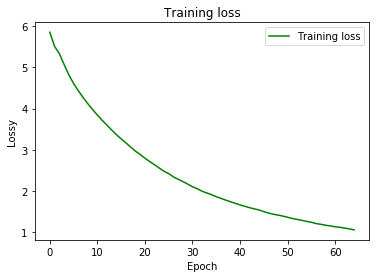

In [23]:
import matplotlib.pyplot as plt
plt.plot(H.history['loss'],'g',label="Training loss")
plt.title("Training loss")
plt.ylabel('Lossy')
plt.xlabel('Epoch')
plt.legend()

## Saving the model

In [21]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

## Testing the model

In [120]:
def generate_description(seed_text, next_words, model, max_seq_len):
    for _ in range(next_words):
        token_list = t.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ''
        
        for word,index in t.word_index.items():
            if index == predicted:
                output_word = word
                break
        
        seed_text = seed_text + " " + output_word
        
    return seed_text

In [56]:
brand="HP "
model_name="ENVY 17-ce1906nd "
Purpose="Editting "

start_seq=brand+model_name+Purpose
print(generate_description(start_seq, 100, model, max_sequence_len))

HP ENVY 17-ce1906nd Editting bq731t to edit photos and watch a movie on the go of a total 10 hours with the weight ram you can easily take this laptop with your laptop or making the garden of a laptop with the anti glare screen you can store all your quickly in the garden so you won't be bothered by reflections from the sun or in a bright lamp with the anti glare screen you won't be bothered by reflections from a bright sun or lamp thanks to the backlit keyboard logging in the dark you can quickly start multiple


In [62]:
brand="Asus "
model_name="ROG Strix G GL531GV-AL116T "
Purpose="is used for Gaming "
        
start_seq=brand+model_name+Purpose
print(generate_text(start_seq, 150, model, max_sequence_len))

Asus ROG Strix G GL531GV-AL116T is used for Gaming  at the highest settings and work thanks to the nvidia geforce rtx 2070 video card you can play games like overwatch at ultra settings without the laptop lagging and the dvd casing you can easily take it in the garden thanks to the anti glare screen you won't be bothered by reflections from the sun or a lamp you won't be bothered by reflecting sunlight so on the train won't charge it in a brightly thanks to the backlit keyboard you can log in quickly and securely with the fingerprint scanner which has a anti glare screen you can log in a few seconds and windows 10 by s mode that means you use applications that the advantage is a backlit keyboard with a touchpad you won't be bothered by light reflections if keep you from working or watching the dark you can connect the laptop in a few seconds


In [54]:
brand="Asus "
model_name="VivoBook S ScreenPad S432FA-EB055T "
Purpose="Casual use "
start_seq=brand+model_name+Purpose

print(generate_description(start_seq, 300, model, max_sequence_len))

Asus VivoBook S ScreenPad S432FA-EB055T Casualuse the editting for your favorite tasks and visual with the second screen with the laptop ram you can easily transport your laptop in a bag or a bag bag the train lasts a second screen because the anti reflective screen you won't be bothered by reflections from the sun or a lamp you won't be bothered by reflecting sunlight so on the train won't charge the backlit keyboard helps you prevent typos to log in the dark you can open a number of each specific moment mode at a disadvantage for example you can use the laptop to your wireless speakers on bluetooth of legends on the 512gb ssd which has the anti glare screen you can log in a few seconds and windows 10 by s mode that means you use applications that the advantage on a backlit keyboard with your dark you can connect the laptop to work in a few seconds or you're in a lecture hall the battery lasts a lamp so you use the hp keyboard in 15 seconds thanks to the ssd you can continue working i

   ![alt text](frontend.png "Title")
    
### Model deployment
After analyzing the results we moved towards the model deployment part. The concept of deployment refers to the application of a model for prediction using unseen identical  data. Making and training the  model is generally not the end of the project. Even if the purpose of the model is to increase knowledge of the data, the knowledge obtained will need to be organized and presented in a way that the customer can use it. Depending on the requirements, the deployment phase can be as simple as generating a report or as complex as implementing a repeatable data science process. In our project we keep the deployment phase as simple as possible. As a result of deployment we can generated text on the output screen.

For deploying the model we use the flask. Flask is a micro web framework which is actually written in python language. It is considered as a microframework because it does not require particular tools or libraries. It has no database abstraction layer, form validation, or any other components where pre-existing third-party libraries provide common functions.

The front end was built in HTML, CSS and Bootstrap. And for rendering the content on the web page we use simple Javascript functions. Here is the simple front end of our project. The model runs locally on the localhost 127.0.0.1. It expects the select the model name, its category , and the length of description. And as a result it produces a description of the input and shows it on the screen.



## 4. Tools

Since we are using Python as our main language, we chose to go along with Jupyter Notebook to implement the model. The architecture of Jupyter is language independent. The decoupling between the client and kernel makes it possible to write kernels in any language. Jupyter brings a lightweight interface for kernel languages that can be wrapped in Python. Also it allows us to create and share documents, from code to complete reports. 

For the visualization of our data we used matplotlib. It is very  fast and efficient. It possesses the ability to work well with many operating systems and graphic backends. It possesses high-quality graphics and plots to print and view for a range of graphs such as histograms, bar charts, pie charts, scatter plots.

With matplotlib, Keras, Sklearn all of the features worked fine. However, at first we used seaborn for the data visualization, it was visualizing data but somehow it was not easy enough to change the graph size and labels in it, so we then used matplotlib instead of it.




## 5. Lessons Learned

RNN’s (Recurrent Neural Networks) can also be used to generate descriptions. This means that in addition to being used for predictive models (making predictions) they can learn the sequences of a problem and then generate entirely new plausible sequences for the problem domain. So we have trained our sequence to sequence model on the corpus of laptop descriptions, which then enables our model to take a product and its category and then generate a description for it. 

What surprised us was the power of LSTMs used in RNN that is more powerful in transferring relevant previous input information in the network by using a more complicated function to calculate new hidden layer neuron values. The key to their good performance is the use of cell states and different gates. So as a result, they generate quite meaningful descriptions.

We made a base model so that we can compare its performance with our RNN and it turns out that RNN was quite accurate than simple machine learning algorithms. Here are some of the results by both of the models.



## Baseline Model

In [34]:
labs=np.argmax(label,axis=1) ## Converting the next word one hot encoded vector to a single digit number
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(predictors,labs)

In [40]:
def generate(seed_text, next_words, model, max_seq_len):
    for _ in range(next_words):
        token_list = t.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        
        predicted = model.predict(token_list)
        
        output_word = ''
        
        for word,index in t.word_index.items():
            if index == predicted:
                output_word = word
                break
        
        seed_text = seed_text + " " + output_word
        
    return seed_text

In [41]:
brand="HP "
model_name="ENVY 17-ce1906nd "
Purpose="Editting "

start_seq=brand+model_name+Purpose
print(generate(start_seq, 100, gnb, max_sequence_len))

HP ENVY 17-ce1906nd Editting  editting editting editting editting editting editting editting editting editting editting casual casual tasks graphics 14 14 edit edit edit edit edit edit edit smooth edit edit edit edit edit smooth edit i5 vr i5 i5 i5 i5 i5 i5 6 i5 i5 i5 i5 i5 browse internet internet inch images internet images internet internet internet images images images program images program images fluently program program only only only only fluently youtube only only youtube only only only only youtube only youtube only youtube youtube only means only 256gb 256gb files files than than other than than files 1tb files 1tb


In [42]:
brand="Asus "
model_name="ROG Strix G GL531GV-AL116T "
Purpose="is used for Gaming "
        
start_seq=brand+model_name+Purpose
print(generate(start_seq, 150, gnb, max_sequence_len))

Asus ROG Strix G GL531GV-AL116T is used for Gaming  editting editting editting editting editting tasks business editting casual tasks kilogram graphics 14 14 edit photo edit edit edit edit edit edit i5 smooth edit edit ultra i5 edit edit vr i5 i5 simultaneously 6 i5 i5 simultaneously browse i5 i5 thin simultaneously internet inch smoothly train images smoothly smoothly train program internet images images internet internet smoothly smoothly smoothly internet program side only only only only only youtube only youtube youtube only only only means only youtube youtube only youtube youtube than than only only because because 1tb than files than than than 1tb storage 1tb files it's 1tb storage storage it's it's it's it's space work or it your your at keyboard at your your backlit keyboard at your backlit backlit keyboard keyboard keyboard keyboard to to keyboard keyboard in to to to keyboard to type to don't don't to type to a password a password a technical


In [44]:
brand="Asus "
model_name="VivoBook S ScreenPad S432FA-EB055T "
Purpose="Casual use "
start_seq=brand+model_name+Purpose

print(generate(start_seq, 300, gnb, max_sequence_len))

Asus VivoBook S ScreenPad S432FA-EB055T Casual use  editting editting casual casual tasks edit casual casual casual graphics graphics 14 edit ultra edit edit edit edit edit edit edits i5 edit i5 i5 i5 i5 graphic i5 runs competitive images simultaneously simultaneously internet internet images internet inch internet intel 6 images competitive smoothly smoothly smoothly internet smoothly train internet smoothly images images images program program program program program doesn't program out only only only youtube youtube youtube youtube youtube only only only only only only only youtube youtube youtube than than than files files 1tb files 1tb 1tb 1tb 1tb storage storage will 1tb space 1tb 1tb your your quickly quickly it's even work or or dark your at your your your your your backlit keyboard thanks dark dark backlit keyboard keyboard keyboard keyboard don't to to to to to don't need to don't need type type a password a a password to a a technical technical technical technical one one te